In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from helpers import display
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['font.family']= 'serif'


 p_c_i = 0.4967


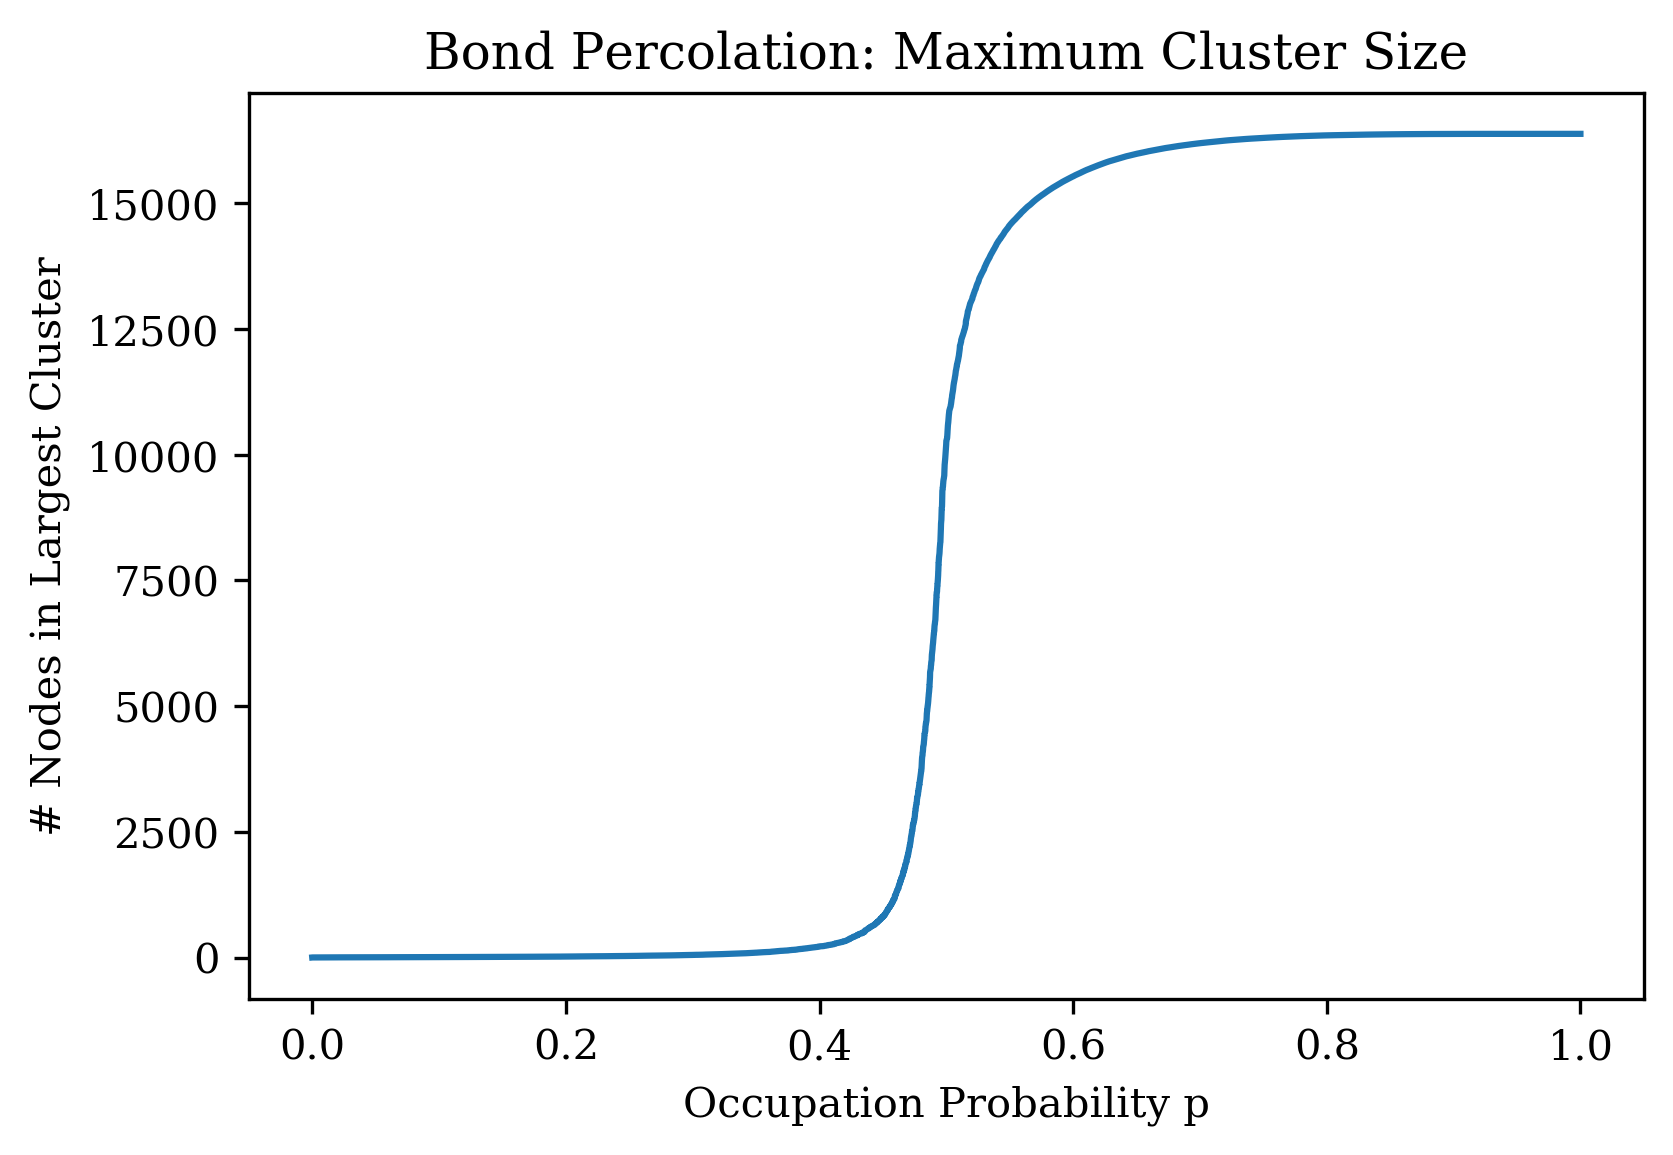

In [2]:
script = "bond_mod.py"
#%run -i $script
outfile = "outfiles/"+script.strip('.py')
display(outfile)

In [4]:
from bond_jupy import *
import helpers as h
from colour import Color
import igraph

# define network bounds: simple 4x4x1 lattice
WIDTH, HEIGHT = 4, 1
W, N = (WIDTH - 1), WIDTH*WIDTH*HEIGHT*3-WIDTH*WIDTH

# define colors for root node weight visualization
red, blue, green = Color("red"), Color("blue"), Color("green")
colors = [list(blue.range_to(green, WIDTH**2*HEIGHT)), list(green.range_to(red, WIDTH**2*HEIGHT))]

# initialize a random list of possible bonds
v1, v2, es = [0]*(3*N), [0]*(3*N), []
index = init_lists(v1, v2, WIDTH, HEIGHT, W)            

#shuffle bonds
shuffle_bonds(index, v1, v2)   

# init M2, ptr lists and biggest cluster
M2, ptr, big, M2minus = N, [-1]*N, 0, [0]*index         
lists = [v1, v2, ptr, M2minus]

#g, style = h.init_g(WIDTH, HEIGHT)
g = igraph.Graph()
g.layout('fruchterman_reingold_3d')
g.add_vertices(WIDTH*WIDTH*HEIGHT)

g.vs["name"] = [i for i in range(0, index)]
for k in range(0, index):
    source, target = cluster(k, lists, big, M2)
    if h.valid_pair(source, target, WIDTH):
        col_s, col_t = h.get_colors([source, target], colors, ptr)
        g.add_edge(source, target)
        g.vs[source]["color"] = col_s
        g.vs[target]["color"] = col_t
    i.plot(g, rescale=False).save("tests/img"+str(k+1)+".png")

DeprecationWarning: To avoid name collision with the igraph project, this visualization library has been renamed to 'jgraph'. Please upgrade when convenient.

In [ ]:
p_c = {}
p_c["32"] = 0.47852
p_c["64"] = 0.48568
p_c["128"] = 0.49298
p_c["256"] = 0.49648

nu = 4/3
L_nu = [int(i)**(-1/nu) for i in p_c]
p_obs = [p_c[i] for i in p_c]
c, res, e, e, e = np.polyfit(L_nu, p_obs, 1, full=True)
slope, intercept = c
plt.title('Extrapolation of Infinite Cubic Lattice', fontsize = 20)
plt.xlabel('$L^{-1/\\nu}$', fontsize=20)
plt.ylabel('$p^*$', fontsize=20)
plt.gcf().set_size_inches(12, 8)
plt.plot(L_nu, p_obs, 'o')
fit = [slope*i+intercept for i in L_nu]
plt.plot(L_nu, fit)
print(intercept)